# Genetic Algorithm from Scratch

In [12]:
from random import randint
import numpy as np

INT_MIN = -999999
# Number of currencies
V = 6

# Names of the currencies
GENES = "ABCDEF"

# Starting Node Value
START = 0

# Initial population size for the algorithm
POP_SIZE = 20

# Structure of a GNOME
# defines the path traversed
# while the fitness value
# of the path is stored in an integer


class individual:
    def __init__(self) -> None:
        self.gnome = ""
        self.fitness = 0

    def __lt__(self, other):
        return self.fitness < other.fitness

    def __gt__(self, other):
        return self.fitness > other.fitness


# Function to return a random number
# from start and end
def rand_num(start, end):
    return randint(start, end-1)


# Function to check if the character
# has already occurred in the string
def repeat(s, ch):
    for i in range(len(s)):
        if s[i] == ch:
            return True

    return False


# Function to return a mutated GNOME
# Mutated GNOME is a string
# with a random interchange
# of two genes to create variation in species
def mutatedGene(gnome):
    gnome = list(gnome)
    while True:
        r = rand_num(1, V)
        r1 = rand_num(1, V)
        if r1 != r:
            temp = gnome[r]
            gnome[r] = gnome[r1]
            gnome[r1] = temp
            break
    return ''.join(gnome)


# Function to return a valid GNOME string
# required to create the population
def create_gnome():
    gnome = "0"
    while True:
        if len(gnome) == V:
            gnome += gnome[0]
            break

        temp = rand_num(1, V)
        if not repeat(gnome, chr(temp + 48)):
            gnome += chr(temp + 48)

    return gnome


# Function to return the fitness value of a gnome.
# The fitness value is the path length
# of the path represented by the GNOME.
def cal_fitness(gnome):
    cost_mat = np.array([
    [1, 0.23, 0.25, 16.43, 18.21, 4.94],
    [4.34, 1, 1.11, 71.40, 79.09, 21.44],
    [3.93, 0.90, 1, 64.52, 71.48, 19.37],
    [0.061, 0.014, 0.015, 1, 1.11, 0.30],
    [0.055, 0.013, 0.014, 0.90, 1, 0.27],
    [0.20, 0.047, 0.052, 3.33, 3.69, 1],
])
    f = 0
    for i in range(len(gnome) - 1):
        if cost_mat[ord(gnome[i]) - 48][ord(gnome[i + 1]) - 48] == INT_MIN:
            return INT_MIN
        f += cost_mat[ord(gnome[i]) - 48][ord(gnome[i + 1]) - 48]

    return f


# Function to return the updated value
# of the cooling element.
def cooldown(temp):
    return (90 * temp) / 100


# Comparator for GNOME struct.
# def lessthan(individual t1,
#                     individual t2)
# :
# return t1.fitness < t2.fitness


# Utility function for Forex problem.
def ForexUtil(mp):
    # Generation Number
    gen = 1
    # Number of Gene Iterations
    gen_thres = 15

    population = []
    temp = individual()

    # Populating the GNOME pool.
    for i in range(POP_SIZE):
        temp.gnome = create_gnome()
        temp.fitness = cal_fitness(temp.gnome)
        population.append(temp)

    print("\nInitial population: \nGNOME      FITNESS VALUE\n")
    for i in range(POP_SIZE):
        print(population[i].gnome, population[i].fitness)
    print()

    found = False
    temperature = 10000

    # Iteration to perform
    # population crossing and gene mutation.
    while temperature > 1000 and gen <= gen_thres:
        population.sort(reverse=True)
        print("\nCurrent temp: ", temperature)
        new_population = []

        for i in range(POP_SIZE):
            p1 = population[i]

            while True:
                new_g = mutatedGene(p1.gnome)
                new_gnome = individual()
                new_gnome.gnome = new_g
                new_gnome.fitness = cal_fitness(new_gnome.gnome)

                if new_gnome.fitness <= population[i].fitness:
                    new_population.append(new_gnome)
                    break

                else:

                    # Accepting the rejected children at
                    # a possible probability above threshold.
                    prob = pow(
                        2.7,
                        -1
                        * (
                            (float)(new_gnome.fitness - population[i].fitness)
                            / temperature
                        ),
                    )
                    if prob > 0.5:
                        new_population.append(new_gnome)
                        break

        temperature = cooldown(temperature)
        population = new_population
        print("Generation", gen)
        print("GNOME    FITNESS VALUE")
        population.sort(reverse=True)

        for i in range(POP_SIZE):
            print(population[i].gnome, population[i].fitness)
        gen += 1


if __name__ == "__main__":

    cost_mat = np.array([
    [1, 0.23, 0.25, 16.43, 18.21, 4.94],
    [4.34, 1, 1.11, 71.40, 79.09, 21.44],
    [3.93, 0.90, 1, 64.52, 71.48, 19.37],
    [0.061, 0.014, 0.015, 1, 1.11, 0.30],
    [0.055, 0.013, 0.014, 0.90, 1, 0.27],
    [0.20, 0.047, 0.052, 3.33, 3.69, 1],
])
    ForexUtil(cost_mat)



Initial population: 
GNOME      FITNESS VALUE

0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003
0241350 143.64300000000003


Current temp:  10000
Generation 1
GNOME    FITNESS VALUE
0142350 144.35399999999998
0231450 144.344
0241530 96.57400000000001
0243150 94.284
0251340 92.23200000000001
0251340 92.23200000000001
0251340 92.23200000000001
0421350 91.024
0421350 91.024
0541320 83.98800000000001
0214350 81.64000000000001
0214350 81.64000000000001
0214350 81.64000000000001
0214350 81.64000000000001
0245310 79.684
0245310 79.684
0

In [14]:
# best_path=[0, 5, 2, 4, 1, 3, 0]

# def total_cost(mat,path,amount):
#     cost=1
#     for i in range(len(path)-1):
#         cost=cost*(mat[path[i]][path[i+1]])
        
#     return cost*amount, cost*amount-amount

In [13]:
# print(total_cost(cost_mat,[0,5,1,4,2,3,0],1000))

(1011.8091716692963, 11.809171669296347)


In [15]:
# print(total_cost(cost_mat,best_path,1000))

(1039.64779184448, 39.647791844480025)


# Genetic Alhgorithm using library (geneticalgorithm by pypi)

In [1]:
pip install geneticalgorithm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [72]:
def total_cost(path):
    cost=1
    pen=0
    
    if np.unique(path).size == len(path):
        path=np.insert(path,0,0)
        path=np.insert(path,len(path),0)
    else:
        pen=500000000
    
    mat = np.array([
    [1, 0.23, 0.25, 16.43, 18.21, 4.94],
    [4.34, 1, 1.11, 71.40, 79.09, 21.44],
    [3.93, 0.90, 1, 64.52, 71.48, 19.37],
    [0.061, 0.014, 0.015, 1, 1.11, 0.30],
    [0.055, 0.013, 0.014, 0.90, 1, 0.27],
    [0.20, 0.047, 0.052, 3.33, 3.69, 1],
])
    for i in range(len(path)-1):
        cost=cost*(mat[int(path[i])][int(path[i+1])])
    return -cost+pen


# varbound=np.array([[1,5]]*5)

# model=ga(function=total_cost,dimension=5,variable_type='int',variable_boundaries=varbound)

# model.run()

# print(model.param)

In [75]:
algorithm_param = {'max_num_iteration': 1000,\
                   'population_size':100,\
                   'mutation_probability':0.2,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=total_cost,dimension=5,variable_type='int',variable_boundaries=varbound,algorithm_parameters=algorithm_param)

 The best solution found:                                                                           
 [5. 2. 4. 1. 3.]

 Objective function:
 -1.03964779184448


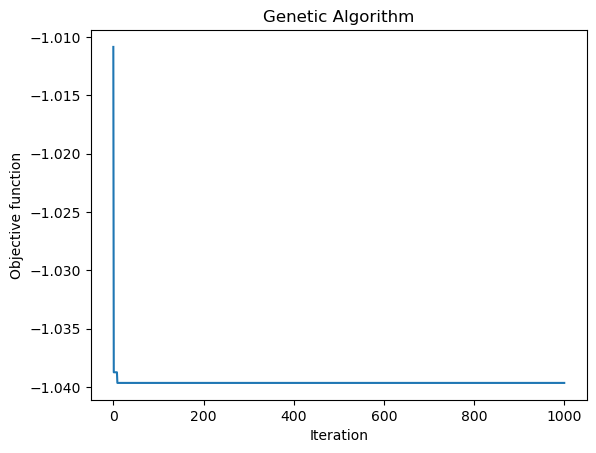

In [76]:
model.run()

In [56]:
# best_path=[0, 5, 2, 4, 1, 3, 0]

# mat = np.array([
#     [1, 0.23, 0.25, 16.43, 18.21, 4.94],
#     [4.34, 1, 1.11, 71.40, 79.09, 21.44],
#     [3.93, 0.90, 1, 64.52, 71.48, 19.37],
#     [0.061, 0.014, 0.015, 1, 1.11, 0.30],
#     [0.055, 0.013, 0.014, 0.90, 1, 0.27],
#     [0.20, 0.047, 0.052, 3.33, 3.69, 1],
# ])

# def total_cost(mat,path,amount):
#     cost=1
#     for i in range(len(path)-1):
#         cost=cost*(mat[path[i]][path[i+1]])
        
#     return cost*amount, cost*amount-amount

In [58]:
# total_cost(mat,[0,3,4,1,5,2,0],1000)

(1038.78236831616, 38.782368316160046)